In [1]:
import pandas as pd

# Load the CSV file to check the content and structure
file_path = "C:/Users/MSI/Documents/prompt_db/prompt_database.xlsx"
data = pd.read_excel(file_path)

In [3]:
# Analyzing the 'DeBERTa' column for the GPT-4 model
deberta_stats = data['DeBERTa'].describe()
deberta_stats

count    1001.000000
mean        0.464091
std         0.446365
min         0.000042
25%         0.001027
50%         0.360322
75%         0.995741
max         0.999913
Name: DeBERTa, dtype: float64

C:\Users\MSI\AppData\Local\Temp\ipykernel_24628\3392353346.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['DeBERTa'], shade=True, color="b", alpha=0.6)


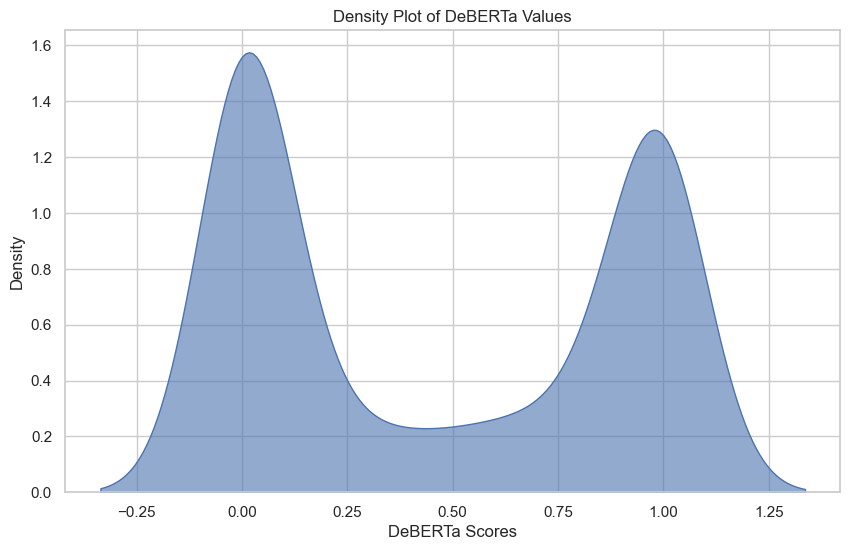

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the density of the 'DeBERTa' column
plt.figure(figsize=(10, 6))
sns.kdeplot(data['DeBERTa'], shade=True, color="b", alpha=0.6)
plt.title('Density Plot of DeBERTa Values')
plt.xlabel('DeBERTa Scores')
plt.ylabel('Density')
plt.show()

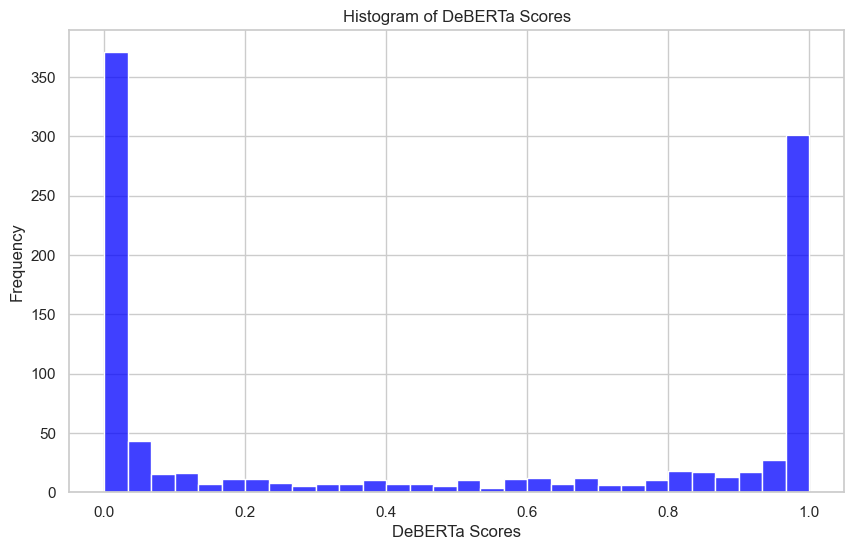

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['DeBERTa'], bins=30, kde=False, color='blue')
plt.title('Histogram of DeBERTa Scores')
plt.xlabel('DeBERTa Scores')
plt.ylabel('Frequency')
plt.show()

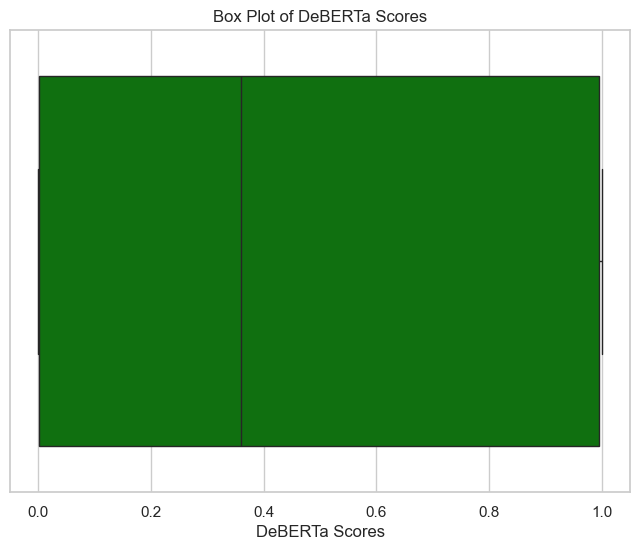

In [6]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['DeBERTa'], color='green')
plt.title('Box Plot of DeBERTa Scores')
plt.xlabel('DeBERTa Scores')
plt.show()

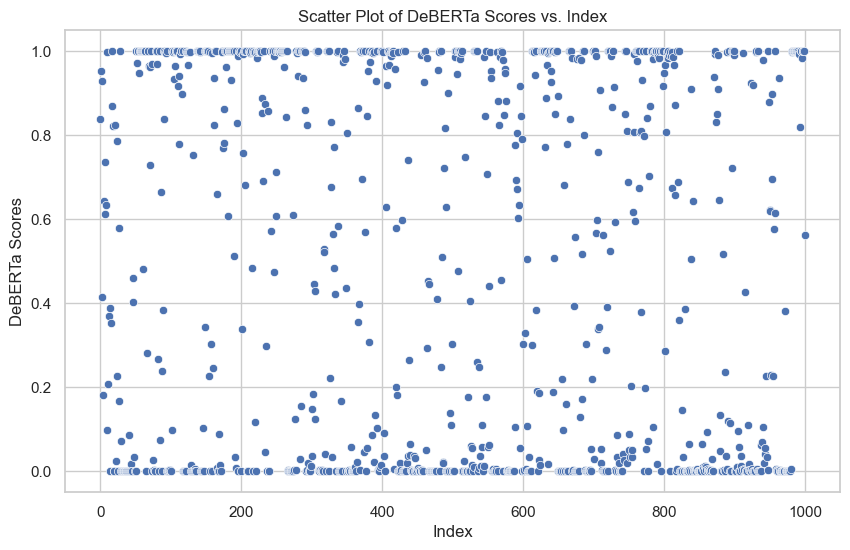

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a scatter plot with index
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['DeBERTa'])
plt.title('Scatter Plot of DeBERTa Scores vs. Index')
plt.xlabel('Index')
plt.ylabel('DeBERTa Scores')
plt.show()

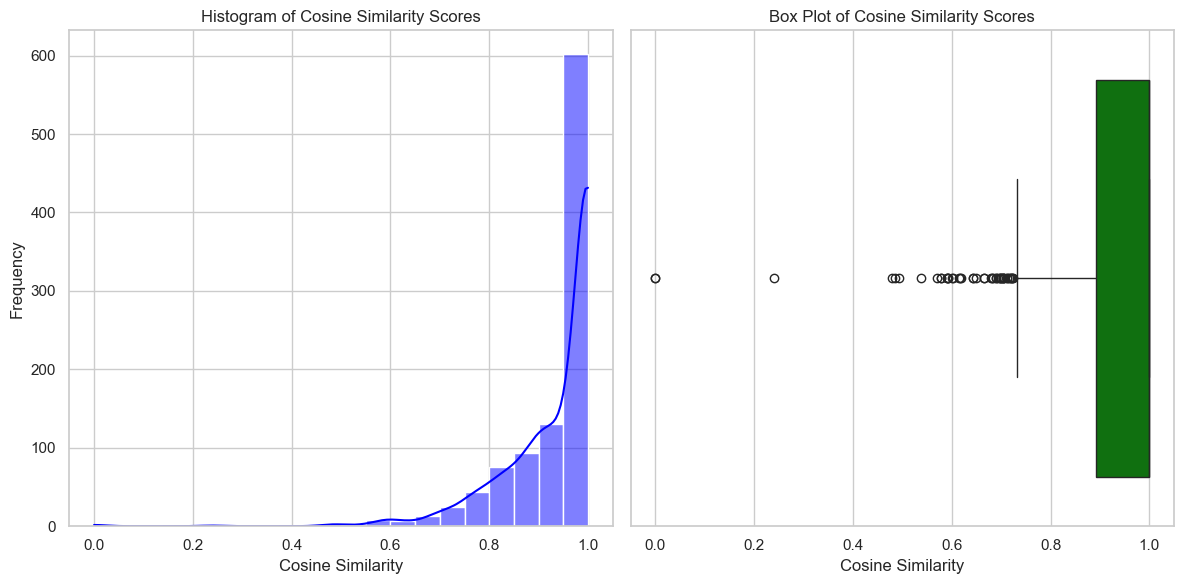

In [9]:
## Analyzing the cosine_similarity column 

# Plotting the histogram and box plot for 'cosine_similarity' column
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['cosine_similarity'], bins=20, kde=True, color='blue')
plt.title('Histogram of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['cosine_similarity'], color='green')
plt.title('Box Plot of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')

plt.tight_layout()
plt.show()

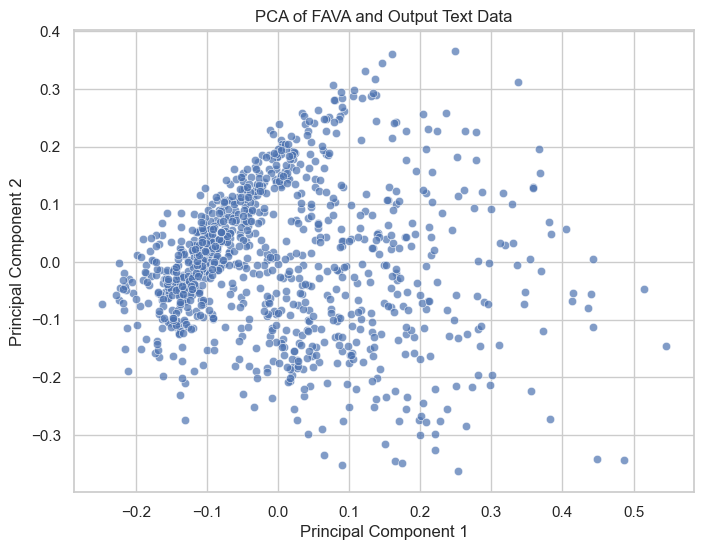

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Combine text data for vectorization
combined_text = data['FAVA'].fillna('') + " " + data['Output'].fillna('')

# Vectorize text data
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(combined_text)

# PCA Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())  # Converting sparse matrix to a dense array for PCA

# Plotting PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], alpha=0.7)
plt.title('PCA of FAVA and Output Text Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

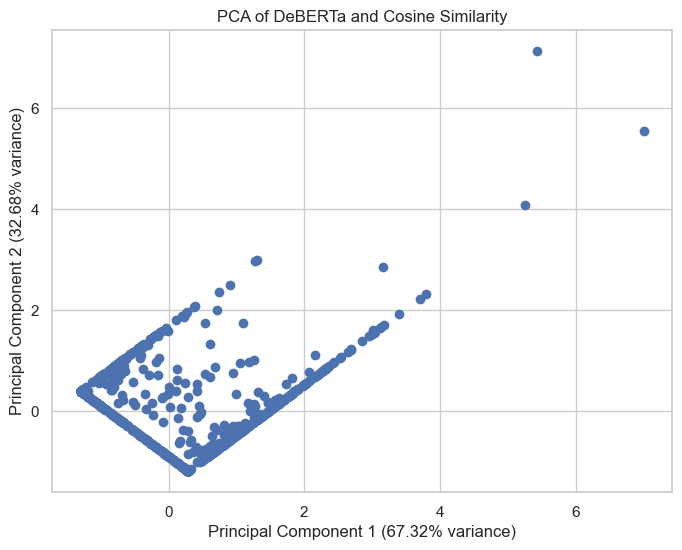

Explained Variance Ratios: [0.67319697 0.32680303]


In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame named 'df'

# Selecting only the 'DeBERTa' and 'cosine_similarity' columns for PCA
features = ['DeBERTa', 'cosine_similarity']
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Fetching the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('PCA of DeBERTa and Cosine Similarity')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.grid(True)
plt.show()

# Output the explained variance
print(f'Explained Variance Ratios: {explained_variance}')


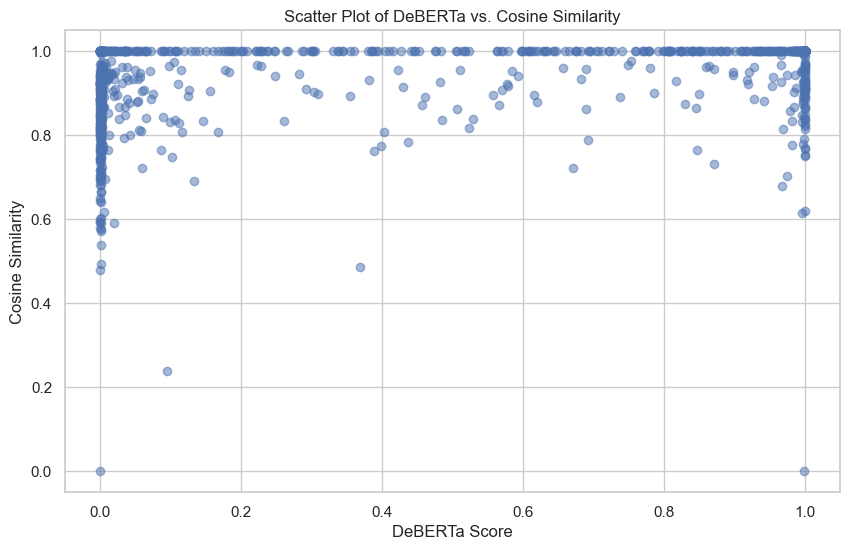

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['DeBERTa'], df['cosine_similarity'], alpha=0.5)
plt.title('Scatter Plot of DeBERTa vs. Cosine Similarity')
plt.xlabel('DeBERTa Score')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()

In [17]:
import pandas as pd

# Load the data
df = data

# Define a simple function to classify the values
def classify_deberta(value):
    if 0.6 <= value <= 1:
        return 'not hallucinated'
    elif 0 <= value <= 0.4:
        return 'hallucinated'
    else:
        return 'neutal or unknown'

# Apply the classification
df['Classification'] = df['DeBERTa'].apply(classify_deberta)

# Count the totals
classification_counts = df['Classification'].value_counts()

# Print the results
print(classification_counts)


Classification
hallucinated         511
not hallucinated     446
neutal or unknown     44
Name: count, dtype: int64
